# Introduction

Data Source is a retail market data of one of the largest Italian retail distribution company called Coop.
The Supermarket aggr.Customer dataset used contains data aggregated from customers and information from shops and pivoted to new columns. the data set contains 40 features and 60366 instances (rows)

Question to be answered: What are the different customer segments based on their purchase behavior?

Algorithm: Principal Component Analysis (PCA), K-Means and RandomForest Classification

Reason for the selected algorithms: PCA for reduction of dimentionality which visualizes the most important features by decomposition and tranformation into principal components (PC),and making use of the linear variance of the data

K-Means clustering is used because it is a fast algorithm mostly used fo customer segmentation especially for numerical data, it also does well with large datasets.

## Importing and cleaning data

Importing neccessary Libraries

In [1]:
# Importing the neccesarry libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from ipywidgets import interact
from mpl_toolkits import mplot3d

Importing dataset

In [2]:
# Importing data from excel into the notebook
df = pd.read_excel(r'C:\Users\Ice Asortse\Desktop\Capstone.xlsx')
df.head()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
0,1,1434.91910,985.87620,4082.5222,3090.0,473.0,7551.701,14.221659,3.150493,2.0,...,10.441143,14.862848,0.000000,0.0,0.000000,6.393403,2.600485,0.000000,0.0,0.000000
1,2,909.76764,254.94832,2295.4840,4508.0,486.0,7820.219,11.235947,2.191422,4.0,...,3.761943,4.848720,2.546600,0.0,16.479185,2.851152,2.009863,2.059450,0.0,2.103394
2,3,1498.94700,754.29560,2831.7727,814.0,234.0,1788.613,5.453088,2.258994,4.0,...,3.757062,5.605183,1.923385,0.0,5.924268,3.426687,2.478529,1.923385,0.0,1.947067
3,4,561.65900,362.79178,2210.3820,648.0,208.0,1679.520,5.976940,2.614292,4.0,...,4.997400,2.688400,5.029184,0.0,7.156351,4.997400,2.688400,2.083168,0.0,2.754427
4,5,605.36280,275.46753,1375.1184,13.0,10.0,17.922,1.792200,1.692000,2.0,...,0.000000,0.967667,2.145571,0.0,0.000000,0.000000,0.633667,2.145571,0.0,0.000000


## Data cleaning and Pre-Processing

Checking for null or missing data

In [3]:
# Checking for null or missing data
df.isna().any()

customer_id                         False
avg_distance_to_shops                True
min_distance_to_shops                True
max_distance_to_shops                True
products_purchased                   True
unique_products_purchased            True
amount_purchased                     True
avg_purchase                         True
avg_price                            True
shops_used                           True
distance_shop_1                     False
distance_shop_2                     False
distance_shop_3                     False
distance_shop_4                     False
distance_shop_5                     False
products_purchased_shop_1           False
products_purchased_shop_2           False
products_purchased_shop_3           False
products_purchased_shop_4           False
products_purchased_shop_5           False
unique_products_purchased_shop_1    False
unique_products_purchased_shop_2    False
unique_products_purchased_shop_3    False
unique_products_purchased_shop_4  

Getting infomation on data types

In [4]:
# Checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60366 entries, 0 to 60365
Data columns (total 40 columns):
customer_id                         60366 non-null int64
avg_distance_to_shops               60365 non-null float64
min_distance_to_shops               60365 non-null float64
max_distance_to_shops               60365 non-null float64
products_purchased                  60365 non-null float64
unique_products_purchased           60365 non-null float64
amount_purchased                    60365 non-null float64
avg_purchase                        60365 non-null float64
avg_price                           60365 non-null float64
shops_used                          60365 non-null float64
distance_shop_1                     60366 non-null float64
distance_shop_2                     60366 non-null float64
distance_shop_3                     60366 non-null float64
distance_shop_4                     60366 non-null float64
distance_shop_5                     60366 non-null float64
products

Checking the data shapes

In [5]:
#printing the shape of the data
print("Shape of the dataframe is {}".format(df.shape))

Shape of the dataframe is (60366, 40)


Data Summary

In [6]:
#checking data summary
df.describe()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
count,60366.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,...,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000
mean,30183.500000,2030.227290,1396.438077,2942.667579,1778.712383,330.668185,4235.493251,8.532106,3.666521,2.380055,...,8.099084,4.974362,1.520414,0.757002,0.808136,4.681516,2.297958,0.760319,0.444549,0.453596
std,17426.307512,1119.909710,1048.415728,1327.528871,2185.051073,236.004343,5006.777082,10.315527,9.133248,1.012191,...,16.535203,11.230346,3.687745,4.902861,2.603233,15.956085,9.966453,1.897947,4.385982,1.325875
min,1.000000,6.642472,6.642472,6.642472,1.000000,1.000000,0.212000,0.212000,0.212000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15092.250000,1250.239000,573.610700,2117.183000,227.000000,127.000000,653.107000,4.532897,2.533746,2.000000,...,3.852688,0.000000,0.000000,0.000000,0.000000,2.647570,0.000000,0.000000,0.000000,0.000000
50%,30183.500000,1936.880200,1184.943000,2869.195300,925.000000,304.000000,2355.138000,6.862780,2.944260,2.000000,...,6.048320,3.209491,0.000000,0.000000,0.000000,3.251844,2.296758,0.000000,0.000000,0.000000
75%,45274.750000,2569.706800,1962.384500,3580.669700,2552.000000,500.000000,6054.631000,10.429567,3.558136,3.000000,...,9.407107,5.978663,2.107243,0.000000,0.000000,4.166946,2.717513,1.840338,0.000000,0.000000
max,60366.000000,9004.164000,9004.164000,9267.698000,22131.000000,1465.000000,51588.656000,787.569000,787.569000,5.000000,...,787.569000,787.569000,263.234000,522.607000,133.967250,787.569000,787.569000,263.234000,522.607000,133.967250


Cleaning data by dropping null values

In [7]:
#Droping null values
df = df.dropna()
df.isna().sum()

customer_id                         0
avg_distance_to_shops               0
min_distance_to_shops               0
max_distance_to_shops               0
products_purchased                  0
unique_products_purchased           0
amount_purchased                    0
avg_purchase                        0
avg_price                           0
shops_used                          0
distance_shop_1                     0
distance_shop_2                     0
distance_shop_3                     0
distance_shop_4                     0
distance_shop_5                     0
products_purchased_shop_1           0
products_purchased_shop_2           0
products_purchased_shop_3           0
products_purchased_shop_4           0
products_purchased_shop_5           0
unique_products_purchased_shop_1    0
unique_products_purchased_shop_2    0
unique_products_purchased_shop_3    0
unique_products_purchased_shop_4    0
unique_products_purchased_shop_5    0
amount_purchased_shop_1             0
amount_purch

In [8]:
# checking for any missing values
df.isna().any().sum()

0

Checking for duplicates

In [9]:
# finding duplicates
duplicates = df[df.duplicated()]
print(len(duplicates))

0


Checking for place holders

In [10]:
# checking for missing values with placeholders
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(10), '\n\n')

customer_id 
 2047     0.000017
51852    0.000017
27288    0.000017
4759     0.000017
6806     0.000017
661      0.000017
2708     0.000017
12947    0.000017
14994    0.000017
8849     0.000017
Name: customer_id, dtype: float64 


avg_distance_to_shops 
 3346.95580    0.000348
3051.82230    0.000331
4237.61100    0.000315
4386.25240    0.000282
2788.37520    0.000282
1170.26450    0.000265
4515.64550    0.000265
3025.29640    0.000265
616.11633     0.000265
3262.24020    0.000248
Name: avg_distance_to_shops, dtype: float64 


min_distance_to_shops 
 1170.26450    0.005400
1195.06600    0.003346
1497.71860    0.002087
1984.16750    0.002071
717.96924     0.001922
1469.90450    0.001839
385.16810     0.001259
1722.64160    0.001209
2816.33200    0.001209
1237.66710    0.001044
Name: min_distance_to_shops, dtype: float64 


max_distance_to_shops 
 3051.8223    0.004920
3346.9558    0.002932
3183.4630    0.002932
3025.2964    0.002187
2838.6108    0.001822
1811.2872    0.001541
2788.3752  

avg_purchase_shop_5 
 0.000    0.794202
0.334    0.000331
9.762    0.000182
4.431    0.000166
2.410    0.000149
0.713    0.000133
0.668    0.000116
0.446    0.000116
3.909    0.000099
2.728    0.000099
Name: avg_purchase_shop_5, dtype: float64 


avg_price_shop_1 
 0.000      0.079732
9.762      0.000944
2.410      0.000348
2.802      0.000315
90.216     0.000248
4.431      0.000232
9.125      0.000215
0.212      0.000182
522.607    0.000166
212.210    0.000166
Name: avg_price_shop_1, dtype: float64 


avg_price_shop_2 
 0.000    0.257947
9.762    0.001077
0.334    0.000348
4.431    0.000282
2.410    0.000282
3.995    0.000265
2.792    0.000215
0.212    0.000199
3.115    0.000182
2.802    0.000182
Name: avg_price_shop_2, dtype: float64 


avg_price_shop_3 
 0.000     0.660350
0.334     0.000497
9.762     0.000282
4.431     0.000215
2.410     0.000199
2.558     0.000199
4.119     0.000182
6.832     0.000182
3.995     0.000166
14.965    0.000133
Name: avg_price_shop_3, dtype: float64 




Checking the shape of the data after cleaning

In [11]:
# Selecting out categorical variables
cat_var = df.select_dtypes('object').columns
cat_var

Index([], dtype='object')

In [12]:
#checking the shape after cleaning
#df.shape, 
df.head()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
0,1,1434.91910,985.87620,4082.5222,3090.0,473.0,7551.701,14.221659,3.150493,2.0,...,10.441143,14.862848,0.000000,0.0,0.000000,6.393403,2.600485,0.000000,0.0,0.000000
1,2,909.76764,254.94832,2295.4840,4508.0,486.0,7820.219,11.235947,2.191422,4.0,...,3.761943,4.848720,2.546600,0.0,16.479185,2.851152,2.009863,2.059450,0.0,2.103394
2,3,1498.94700,754.29560,2831.7727,814.0,234.0,1788.613,5.453088,2.258994,4.0,...,3.757062,5.605183,1.923385,0.0,5.924268,3.426687,2.478529,1.923385,0.0,1.947067
3,4,561.65900,362.79178,2210.3820,648.0,208.0,1679.520,5.976940,2.614292,4.0,...,4.997400,2.688400,5.029184,0.0,7.156351,4.997400,2.688400,2.083168,0.0,2.754427
4,5,605.36280,275.46753,1375.1184,13.0,10.0,17.922,1.792200,1.692000,2.0,...,0.000000,0.967667,2.145571,0.0,0.000000,0.000000,0.633667,2.145571,0.0,0.000000


In [13]:
data1 = df.drop('customer_id', axis=1)
data1.head()

,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,distance_shop_1,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
0,1434.91910,985.87620,4082.5222,3090.0,473.0,7551.701,14.221659,3.150493,2.0,4082.5222,...,10.441143,14.862848,0.000000,0.0,0.000000,6.393403,2.600485,0.000000,0.0,0.000000
1,909.76764,254.94832,2295.4840,4508.0,486.0,7820.219,11.235947,2.191422,4.0,1115.3433,...,3.761943,4.848720,2.546600,0.0,16.479185,2.851152,2.009863,2.059450,0.0,2.103394
2,1498.94700,754.29560,2831.7727,814.0,234.0,1788.613,5.453088,2.258994,4.0,1418.8348,...,3.757062,5.605183,1.923385,0.0,5.924268,3.426687,2.478529,1.923385,0.0,1.947067
3,561.65900,362.79178,2210.3820,648.0,208.0,1679.520,5.976940,2.614292,4.0,1104.3829,...,4.997400,2.688400,5.029184,0.0,7.156351,4.997400,2.688400,2.083168,0.0,2.754427
4,605.36280,275.46753,1375.1184,13.0,10.0,17.922,1.792200,1.692000,2.0,1913.7630,...,0.000000,0.967667,2.145571,0.0,0.000000,0.000000,0.633667,2.145571,0.0,0.000000


In [14]:
data1.shape

(60365, 39)

Standardizing data

In [15]:
#Standardizing the data
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data1), columns=data1.columns)

In [16]:
# viewing the first 5 rows
data.head()

,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,distance_shop_1,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
0,-0.531572,-0.391605,0.858636,0.600123,0.603095,0.662349,0.551557,-0.056500,-0.375480,1.237494,...,0.141633,0.880509,-0.412296,-0.154403,-0.310441,0.107283,0.030351,-0.400608,-0.101358,-0.342117
1,-1.000499,-1.088785,-0.487514,1.249083,0.658179,0.715981,0.262116,-0.161510,1.600447,-1.077865,...,-0.262306,-0.011195,0.278263,-0.154403,6.019842,-0.114718,-0.028910,0.684487,-0.101358,1.244305
2,-0.474400,-0.612493,-0.083536,-0.441509,-0.409607,-0.488718,-0.298486,-0.154111,1.600447,-0.841043,...,-0.262601,0.056164,0.109266,-0.154403,1.965296,-0.078648,0.018114,0.612796,-0.101358,1.126400
3,-1.311338,-0.985921,-0.551620,-0.517481,-0.519775,-0.510507,-0.247703,-0.115210,1.600447,-1.086418,...,-0.187589,-0.203560,0.951462,-0.154403,2.438586,0.019792,0.039172,0.696984,-0.101358,1.735327
4,-1.272314,-1.069213,-1.180812,-0.808094,-1.358750,-0.842379,-0.653380,-0.216192,-0.375480,-0.454839,...,-0.489818,-0.356782,0.169516,-0.154403,-0.310441,-0.293405,-0.166993,0.729863,-0.101358,-0.342117


## Principal Component Analysis

Using PCA for feature reduction

0.9860533840867504

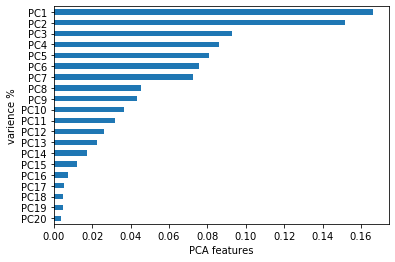

In [17]:
##Use PCA with n_componet = 20
n_components=20
pca = PCA(n_components= n_components)

principalComponents = pca.fit_transform(data)
principalComponents.shape

features = [f"PC{i+1}" for i in range(n_components)]

#Get Explained Varience as Series

explained_var = pd.Series(pca.explained_variance_ratio_, index=features)
ax = explained_var.sort_values().plot(kind='barh')
ax.set(xlabel = 'PCA features', ylabel = 'varience %')

explained_var.sum() # showing the percentage we can account for

Changing PCA components to dataframe

In [18]:
# converting PCA components to dataframe
PCA_components = pd.DataFrame(principalComponents, columns=features)
PCA_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.559940,-2.993787,-1.241647,-1.115327,-2.080298,1.474792,0.371720,-0.678832,0.114854,-0.135394,0.048358,-0.175714,0.158698,-0.186763,0.722143,0.005991,0.224191,0.245424,-0.039755,0.178960
1,5.448082,4.881805,5.432536,-9.263440,1.914615,2.820750,1.705405,-0.491309,-0.320226,-1.165151,0.520309,1.657047,0.525072,-0.612072,-0.378189,-0.138124,0.319442,0.009101,0.273474,-0.401560
2,0.757159,2.857626,1.142339,-2.571163,0.402744,0.984323,0.351117,0.552366,0.167076,1.319583,-0.708882,0.004517,0.037182,-0.454211,-0.236395,-0.267146,-0.739186,0.566388,-0.840260,-0.204057
3,1.473470,4.047202,0.030622,-1.980459,0.736318,0.957321,0.650058,0.402652,0.317335,1.624018,-0.191968,-0.671642,-0.342655,0.000544,0.017544,-0.272565,-0.843381,0.213448,-0.143989,0.348075
4,-1.221121,2.807695,-1.376241,-0.162693,-1.207277,0.082426,-0.548053,-0.251035,0.205364,0.343013,1.019023,0.722256,-0.283693,0.311775,0.384390,-0.481112,-0.125823,-0.023100,0.031086,-0.046836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60360,-3.931111,-3.934155,-0.009603,-0.880359,2.587404,1.272189,0.657012,-0.211278,-0.019027,0.195919,1.155694,-0.310095,0.029296,-0.238219,0.460016,-0.399483,-0.042477,0.111509,-0.030558,0.218878
60361,-0.959446,1.699349,0.545811,0.682647,-0.603158,-1.412218,-0.597381,-0.108896,-0.467609,-1.198640,-1.010753,0.187964,-0.053555,0.617339,0.730547,0.558406,-0.009884,0.124280,0.160555,-0.115740
60362,-1.723746,3.067154,-0.673040,0.033048,-1.545601,-0.583983,-0.521382,-0.371447,-0.170400,-0.876809,0.053280,0.047297,-0.093108,0.593697,-0.139232,-0.192419,-0.054772,-0.004075,-0.041454,0.032568
60363,-1.983909,1.576952,-0.512276,-0.063210,-0.945663,-0.646305,0.366777,-0.573036,-0.063918,-0.775893,0.589703,-0.014264,-0.404917,0.500383,-0.411150,-0.141074,-0.024749,-0.091566,-0.142159,0.133962


Visualize the first couple features

Text(0, 0.5, 'PC2')

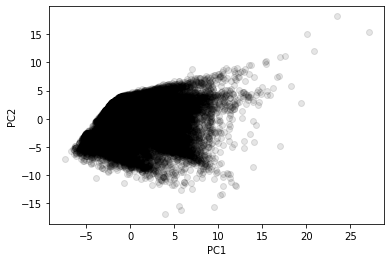

In [19]:
# visualizing scatter cluster in 2D
plt.scatter(PCA_components['PC1'], PCA_components['PC2'], alpha=0.1, color='black')
plt.xlabel('PC1')
plt.ylabel('PC2')

Creating an interactive visualization for 2 components

In [20]:
#Creating interactive 2D components visualization
@interact(xcol=features, ycol=features)
def plot_pca_2d(xcol='PC1', ycol='PC2'):
    plt.scatter(PCA_components[xcol], PCA_components[ycol], alpha=0.1, 
                c=sns.color_palette('RdBu', n_colors=len(PCA_components)))
    plt.xlabel(xcol)
    plt.ylabel(ycol)

interactive(children=(Dropdown(description='xcol', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', '…

Interactive 3D Visualization for 3 components

In [21]:
# Creating interactive 3D component visualization
@interact(xcol=features, ycol=features)
def plot_pca_2d(xcol='PC1', ycol='PC2', zcol='PC3'):
    ax = plt.axes(projection='3d')
    fig = ax.get_figure()
    fig.set_size_inches(10,10)
    
    
    ax.scatter3D(PCA_components[xcol],PCA_components[ycol], PCA_components[zcol],
                c=sns.color_palette('RdBu', n_colors=len(PCA_components)))
    ax.set(xlabel=xcol, ylabel=ycol, zlabel=zcol)
    

interactive(children=(Dropdown(description='xcol', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', '…

Creating a function to iterate through the pca components

In [22]:
# Creating a fuction to ileterate through the components
def get_pca(data, n_components, plot=False):
    # Use PCA with n_component = 20
    n_components=20
    pca = PCA(n_components= n_components)

    principalComponents = pca.fit_transform(data)

    features = [f"PC{i+1}" for i in range(n_components)]
    PCA_components = pd.DataFrame(principalComponents, columns=features)

    #Get Explained Varience as Series

    explained_var = pd.Series(pca.explained_variance_ratio_, index=features)
    
    if plot:
        ax = explained_var.sort_values().plot(kind='barh')
        ax.set(xlabel = 'PCA features', ylabel = 'varience %')

    return PCA_components
PCA_components = get_pca(data, n_components=20)
PCA_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.559940,-2.993787,-1.241647,-1.115327,-2.080298,1.474792,0.371720,-0.678832,0.114854,-0.135394,0.048358,-0.175714,0.158698,-0.186763,0.722143,0.005991,0.224191,0.245425,-0.039755,0.178966
1,5.448082,4.881805,5.432536,-9.263440,1.914615,2.820750,1.705405,-0.491309,-0.320226,-1.165151,0.520309,1.657047,0.525072,-0.612072,-0.378189,-0.138123,0.319443,0.009102,0.273476,-0.401560
2,0.757159,2.857626,1.142339,-2.571163,0.402744,0.984323,0.351117,0.552366,0.167076,1.319583,-0.708882,0.004517,0.037182,-0.454211,-0.236395,-0.267146,-0.739186,0.566387,-0.840257,-0.204059
3,1.473470,4.047202,0.030622,-1.980459,0.736318,0.957321,0.650058,0.402652,0.317335,1.624018,-0.191968,-0.671642,-0.342655,0.000544,0.017544,-0.272565,-0.843382,0.213448,-0.143989,0.348072
4,-1.221121,2.807695,-1.376241,-0.162693,-1.207277,0.082426,-0.548053,-0.251035,0.205364,0.343013,1.019023,0.722256,-0.283693,0.311775,0.384390,-0.481111,-0.125823,-0.023101,0.031088,-0.046834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60360,-3.931111,-3.934155,-0.009603,-0.880359,2.587404,1.272189,0.657012,-0.211278,-0.019027,0.195919,1.155694,-0.310095,0.029296,-0.238219,0.460016,-0.399483,-0.042477,0.111509,-0.030558,0.218877
60361,-0.959446,1.699349,0.545811,0.682647,-0.603158,-1.412218,-0.597381,-0.108896,-0.467609,-1.198640,-1.010753,0.187964,-0.053555,0.617339,0.730547,0.558406,-0.009884,0.124280,0.160554,-0.115738
60362,-1.723746,3.067154,-0.673040,0.033048,-1.545601,-0.583983,-0.521382,-0.371447,-0.170400,-0.876809,0.053280,0.047297,-0.093108,0.593697,-0.139232,-0.192419,-0.054772,-0.004074,-0.041455,0.032566
60363,-1.983909,1.576952,-0.512276,-0.063210,-0.945663,-0.646305,0.366777,-0.573036,-0.063918,-0.775893,0.589703,-0.014264,-0.404917,0.500383,-0.411150,-0.141074,-0.024749,-0.091566,-0.142159,0.133965


Interactive visualization in 3D for for 3 components

In [23]:
#Creating 3D for 3 components
@interact(xcol=features, ycol=features)
def plot_pca_3d(xcol='PC1', ycol='PC2', zcol='PC3'):
    fig = px.scatter_3d(PCA_components, x=xcol, y=ycol, z=zcol)
    fig.update_traces(marker={'size':2})
    return fig

interactive(children=(Dropdown(description='xcol', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', '…

## KMeans Clustering 

finding best value for k in KMeans Clustering

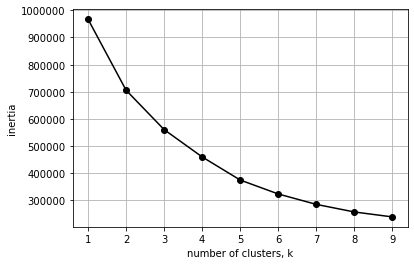

In [24]:
# Finding the best value for K
ks = range(1,10)
inertia = []
cal_bar_score = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:3])
    inertia.append(model.inertia_)
    
plt.plot(ks, inertia, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.grid()
plt.show()

Best k

In [25]:
model = KMeans(3)
model.fit(PCA_components.iloc[:,:3])

preds = model.predict(PCA_components.iloc[:,:3])

Interactive visualization for best value of k

In [26]:
# Creating bst visualization for best value of K
@interact(xcol=features, ycol=features, zcol=features, K=(0,10))
def plot_3d(xcol='PC1', ycol='PC2', zcol='PC3', k=7): # n=list(range(1,len(data)))):
    
    model = KMeans(k)
    
    model.fit(PCA_components)
    
    preds = model.predict(PCA_components)
    
    ax = plt.axes(projection='3d')
    fig = ax.get_figure()
    fig.set_size_inches(10,10)
    
    ax.scatter3D(PCA_components[xcol],PCA_components[ycol], PCA_components[zcol], alpha=0.2, s=2, c=preds)
    ax.set(xlabel=xcol, ylabel=ycol, zlabel=zcol, title=f"{k} clusters")

interactive(children=(Dropdown(description='xcol', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', '…

## Modeling

Modeling for k value of 7

In [27]:
## best K
model = KMeans(7)
model.fit(PCA_components.iloc[:,:3])

preds = model.predict(PCA_components.iloc[:,:3])
plot_df = PCA_components.copy()
plot_df['clusters'] = preds

Interactive 3D visualization of k value of 7

In [28]:
# Using best value of K for Model
@interact(xcol=features, ycol=features, zcol=features) #, K=(0,10))
def plot_3d(xcol='PC1', ycol='PC2', zcol='PC3', k=7):
    fig = px.scatter_3d(plot_df, x=xcol, y=ycol, z=zcol, symbol='clusters', color='clusters')
    fig.update_traces(marker={'size':2})
    return fig   

interactive(children=(Dropdown(description='xcol', options=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', '…

Model

In [29]:
# Model 
model = KMeans(7)
model.fit(PCA_components)

preds = model.predict(PCA_components)
data['target'] = preds

We will input the clusters as our target to see the feature importances and train the model

Data split

In [30]:
# Spliting the data for training purpose
from sklearn.model_selection import train_test_split
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.shape, y_test.shape

((45273, 39), (15092,))

RandomForest initialization

In [31]:
# creating a random forest classification
rf_clf = RandomForestClassifier(criterion='entropy', max_features = 20)
rf_clf


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Data Training

In [32]:
# Training random forest classification model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Data Testing

In [33]:
# Testing random forest classification model
y_hat_test = rf_clf.predict(X_test)

Model evaluation

In [34]:
# Creating a function to evaluate the model
def evaluate_model(y_test, y_hat_test, tree=None, conf_matrix_kws={'normalize':True},
                  roc_curve_kws ={}):
    print(metrics.classification_report(y_test, y_hat_test))
    
    if tree is None:
        df_important= None
    try:
        df_important = plot_importance(tree)
    except:
        df_important = None
        
   # fig2, ax2 = plot_auc_roc_curve(y_test, y_hat_test)


Evaluation Results

In [35]:
# Result for the evaluation
evaluate_model(y_test, y_hat_test)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1387
           1       0.99      0.93      0.96       154
           2       0.98      0.97      0.98      2149
           3       0.96      0.97      0.97       509
           4       0.99      1.00      0.99      9472
           5       0.99      0.97      0.98       235
           6       0.98      0.99      0.99      1186

    accuracy                           0.99     15092
   macro avg       0.98      0.97      0.98     15092
weighted avg       0.99      0.99      0.99     15092



Getting feature importance

In [36]:
# Finding the most important features
pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

products_purchased                  0.195648
amount_purchased                    0.130993
distance_shop_5                     0.112459
amount_purchased_shop_2             0.069567
distance_shop_3                     0.054118
amount_purchased_shop_3             0.049100
unique_products_purchased           0.046721
products_purchased_shop_2           0.045680
amount_purchased_shop_1             0.038468
products_purchased_shop_1           0.033682
distance_shop_1                     0.025777
products_purchased_shop_3           0.022900
amount_purchased_shop_5             0.019518
avg_distance_to_shops               0.018947
unique_products_purchased_shop_1    0.015133
products_purchased_shop_5           0.014073
amount_purchased_shop_4             0.012186
unique_products_purchased_shop_2    0.010633
distance_shop_4                     0.009850
avg_purchase_shop_2                 0.008625
products_purchased_shop_4           0.008613
avg_purchase_shop_3                 0.006544
min_distan

Visualization of featue importance

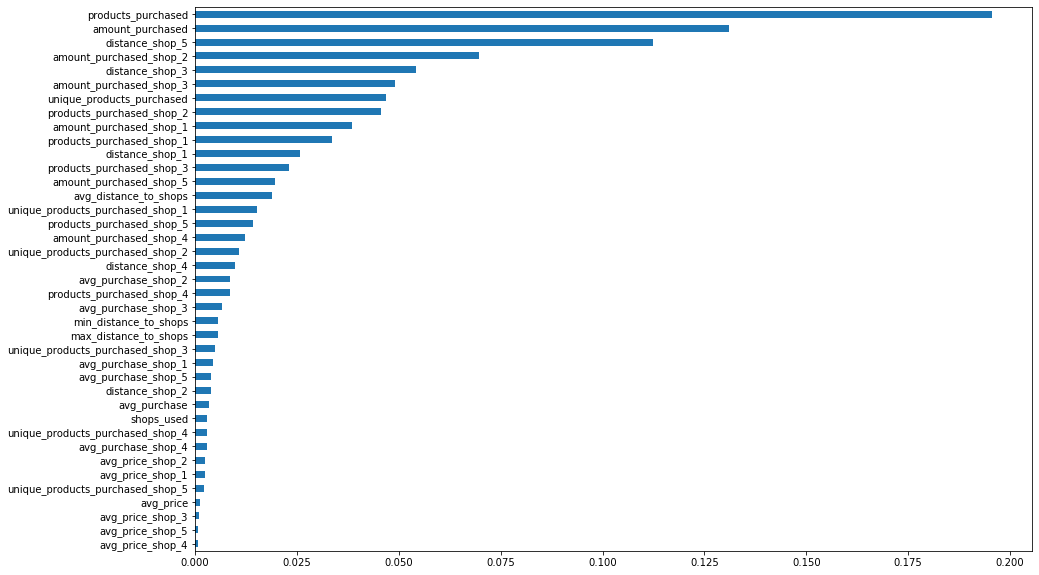

In [37]:
# Visualizating feature importance
pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values().plot(kind='barh', figsize=(15,10))

Text(0.5, 257.44, 'Predicted label')

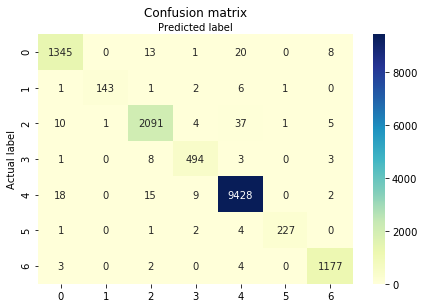

In [38]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_clf.predict(X_test))
class_names=[0,1,2,3,4,5,6] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=0.5)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 98.76


## Creating visualization for the clusters and shop

In [40]:
df['clusters'] = preds

In [41]:
df.head()
df2 = df[['amount_purchased_shop_1', 'amount_purchased_shop_2', 'amount_purchased_shop_3', 'amount_purchased_shop_4', 'amount_purchased_shop_5','clusters']]

In [42]:
df2.head()

,amount_purchased_shop_1,amount_purchased_shop_2,amount_purchased_shop_3,amount_purchased_shop_4,amount_purchased_shop_5,clusters
0,803.968,6747.733,0.000,0.0,0.000,0
1,395.004,848.526,50.932,0.0,6525.757,5
2,120.226,582.939,25.004,0.0,1060.444,4
3,99.948,13.442,628.648,0.0,937.482,4
4,0.000,2.903,15.019,0.0,0.000,4


In [43]:
plot_cols = ['amount_purchased_shop_1','amount_purchased_shop_2','amount_purchased_shop_3','amount_purchased_shop_4',
            'amount_purchased_shop_5', 'clusters']

In [44]:
plotdf = df[plot_cols]
plotdf = pd.melt(plotdf, "clusters", value_name="measurement")
plotdf.tail(10)

,clusters,variable,measurement
301815,6,amount_purchased_shop_5,0.0
301816,4,amount_purchased_shop_5,0.0
301817,4,amount_purchased_shop_5,0.0
301818,4,amount_purchased_shop_5,0.0
301819,4,amount_purchased_shop_5,0.0
301820,6,amount_purchased_shop_5,0.0
301821,4,amount_purchased_shop_5,0.0
301822,4,amount_purchased_shop_5,0.0
301823,4,amount_purchased_shop_5,0.0
301824,4,amount_purchased_shop_5,0.0


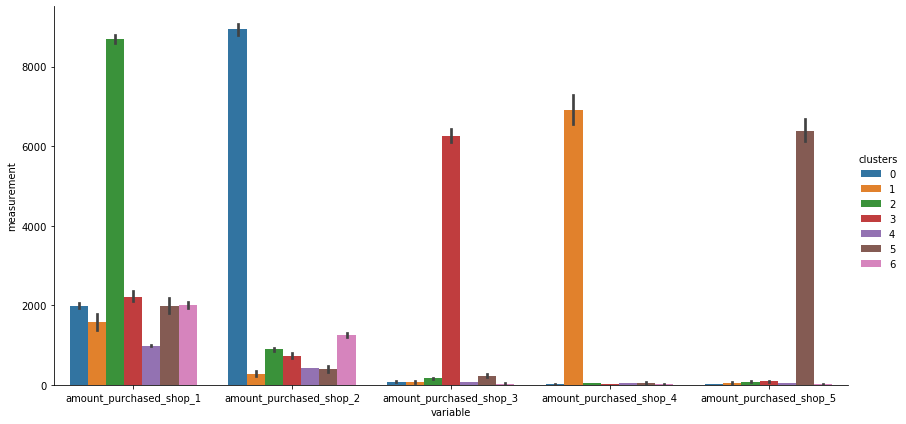

In [45]:
import seaborn as sns
sns.catplot(kind='bar', data=plotdf, hue = 'clusters', x='variable', y='measurement', height=6, aspect=2)

## Inference, Importance and Conclusion

### Inference

The Research Question which states that "What are the different customer segments based on their purchase behavior?" is answered and the clusters that we found are a reflection of the purchase behavior of customers. It shows where customers shop mostly. 
there are 7 clusters revealed from our 3-Dimensional visualization. From these clusters, we can analyze and identify individual customers from their customer IDs. by doing so, we can better understand the make up of each cluster.

### Importance

These clusters are very important as they can help understand the make up of common tendencies of customers in a cluster.

Company can develop  specific business strategy to target these customers efficiently and  effectively. 

They also can help in customer satisfaction and  retention.

These strategies can come in ways of discounts, offers, deals etc. 

It also can help the business minimize cost by allocating the most sought out goods to those  shops that specifically have the demand.

### Conclusion

The customer segmentation analysis was directed towards understanding customer purchase behavior and the underlying factors that give rise to those behaviors.
we did several exploratory data analysis in both 2-Dimensions and 3-Dimensions to get the wholistic picture of the clusters.
we used PCA to reduce the features and also determine the feature importance.
we also used KMeans clusters to detect the various clusters and ran a random forest clasification to train and test the data. 
finally, we used the available data to answer the research question and offered insight to the business strategy. 

In [46]:
count_sum = df.groupby('clusters')[plot_cols].sum()
count_sum

,amount_purchased_shop_1,amount_purchased_shop_2,amount_purchased_shop_3,amount_purchased_shop_4,amount_purchased_shop_5,clusters
clusters,,,,,,
0,1.141238e+07,5.109575e+07,4.507097e+05,5.993609e+04,9.646477e+04,0
1,1.023513e+06,1.856730e+05,4.032082e+04,4.488237e+06,3.113934e+04,650
2,7.371451e+07,7.562098e+06,1.375204e+06,4.532494e+05,7.143562e+05,16982
3,4.640784e+06,1.539384e+06,1.306655e+07,4.549309e+04,1.965230e+05,6270
4,3.702585e+07,1.599960e+07,2.998771e+06,1.509200e+06,1.471743e+06,150456
5,1.794312e+06,3.598795e+05,2.059145e+05,5.140476e+04,5.775608e+06,4520
6,9.859968e+06,6.157786e+06,1.690765e+05,5.163371e+04,5.252566e+04,29376
